In [ ]:
import os
import random
import numpy as np, pandas as pd
import shutil

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms as T

import torchvision.datasets as datasets
from torchvision.io import read_image

from matplotlib import pyplot as plt
from PIL import Image

from pathlib import Path
from PIL import Image

torch.manual_seed(42)

# Getting the dataset from kaggle into the colab notebook and extracting it.

In [ ]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 2.7 MB/s 


In [ ]:
import jovian

In [ ]:
#Make directory name kaggle
! mkdir ~/.kaggle

In [ ]:
#Copy the json kaggle to this directory
! cp kaggle.json ~/.kaggle/

In [ ]:
#Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# downloading the dataset
! kaggle datasets download -d tawsifurrahman/covid19-radiography-database

100% 776M/778M [00:05<00:00, 150MB/s]
100% 778M/778M [00:05<00:00, 154MB/s]


#Unzipping

In [ ]:
#extracting the zip files from the dataset

# Put on the same directory
from zipfile import ZipFile 
  
# specifying the name of the zip file
file = "covid19-radiography-database.zip"
  
# open the zip file in read mode
with ZipFile(file, 'r') as z: 
    # list all the contents of the zip file
    z.printdir() 
  
    # extract all files
    print('extraction...') 
    z.extractall() 
    print('Done!')

Streaming output truncated to the last 5000 lines.
COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png 2022-03-19 13:41:48         1507
COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png 2022-03-19 13:41:48         1453
COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png 2022-03-19 13:41:48         1435
COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png 2022-03-19 13:41:48         1663
COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png 2022-03-19 13:41:48         1374
COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png 2022-03-19 13:41:48         1522
COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png 2022-03-19 13:41:48         1350
COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png 2022-03-19 13:41:48         1516
COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png 2022-03-19 13:41:48         1607
COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png 2022-03-19 13:41:48         1536
COVID-19_Radiography_Dataset/Normal/mask

# Keeping the required files and formatting the folders as required by pytorch.

In [ ]:
!sudo rm -r ./COVID-19_Radiography_Dataset/COVID/masks
!sudo rm -r ./COVID-19_Radiography_Dataset/Normal/masks
!sudo rm -r ./COVID-19_Radiography_Dataset/Viral\ Pneumonia/masks

In [ ]:
for i in os.listdir("/content/COVID-19_Radiography_Dataset/COVID/images"):
  source_path = os.path.join("/content/COVID-19_Radiography_Dataset/COVID/images", i)
  target_path = "/content/COVID-19_Radiography_Dataset/COVID/"
  shutil.move(source_path, target_path)

In [ ]:
!sudo rm -r ./COVID-19_Radiography_Dataset/COVID/images

In [ ]:
for i in os.listdir("/content/COVID-19_Radiography_Dataset/Normal/images"):
  source_path = os.path.join("/content/COVID-19_Radiography_Dataset/Normal/images", i)
  target_path = "/content/COVID-19_Radiography_Dataset/Normal/"
  shutil.move(source_path, target_path)

In [ ]:
!sudo rm -r ./COVID-19_Radiography_Dataset/Normal/images

In [ ]:
for i in os.listdir("/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images"):
  source_path = os.path.join("/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images", i)
  target_path = "/content/COVID-19_Radiography_Dataset/Viral Pneumonia/"
  shutil.move(source_path, target_path)

In [ ]:
!sudo rm -r ./COVID-19_Radiography_Dataset/Viral\ Pneumonia/images

In [ ]:
!sudo rm -r ./COVID-19_Radiography_Dataset/Lung_Opacity/

In [ ]:
!sudo rm ./COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx # 'normal', 'viral', 'covid'

In [ ]:
# !sudo rm -r ./covid19-radiography-database.zip
# !sudo rm -r ./COVID-19_Radiography_Dataset

#### Setting up the base folders and root directories as per the dataset received.

In [ ]:
root_dir = 'COVID-19_Radiography_Dataset'
base_dir = '/content/covid-19/'
os.rename(root_dir, base_dir)

In [ ]:
normal_source_dir = '/content/covid-19/Normal'
normal_class_dir = '/content/covid-19/normal'

covid_source_dir = '/content/covid-19/COVID'
covid_class_dir = '/content/covid-19/covid'

pneumonia_source_dir = '/content/covid-19/Viral Pneumonia'
viral_class_dir = '/content/covid-19/viral'

os.rename(normal_source_dir, normal_class_dir)
os.rename(covid_source_dir, covid_class_dir)
os.rename(pneumonia_source_dir, viral_class_dir)

In [ ]:
!sudo rm -rf ./covid-19/.ipynb_checkpoints/
!sudo rm -r ./covid-19/COVID.metadata.xlsx
!sudo rm -r ./covid-19/Normal.metadata.xlsx
!sudo rm -r ./covid-19/Viral\ Pneumonia.metadata.xlsx
!sudo rm -r ./covid-19/README.md.txt

# Making dataframe of labels and filepath

In [ ]:
images_path = list()

for classes in os.listdir(base_dir):
    if classes != 'test' and classes.split('.')[-1] not in ['xlsx', 'txt']:
      classes_path = os.path.join(base_dir, classes)
      print(classes_path)
    
    for images in os.listdir(classes_path):
        images_path.append([classes_path + "/" + images, classes])

/content/covid-19/viral
/content/covid-19/normal
/content/covid-19/covid


In [ ]:
images_path[2001]

['/content/covid-19/normal/Normal-2521.png', 'normal']

In [ ]:
df = pd.DataFrame(images_path, columns = ['Filepath', 'label'])
df

,Filepath,label
0,/content/covid-19/viral/Viral Pneumonia-26.png,viral
1,/content/covid-19/viral/Viral Pneumonia-199.png,viral
2,/content/covid-19/viral/Viral Pneumonia-1208.png,viral
3,/content/covid-19/viral/Viral Pneumonia-54.png,viral
4,/content/covid-19/viral/Viral Pneumonia-346.png,viral
...,...,...
15148,/content/covid-19/covid/COVID-3021.png,covid
15149,/content/covid-19/covid/COVID-2412.png,covid
15150,/content/covid-19/covid/COVID-812.png,covid
15151,/content/covid-19/covid/COVID-1169.png,covid


In [ ]:
normal_df = df[df['label'] == 'normal'].index
covid_df = df[df['label'] == 'covid'].index
viral_df = df[df['label'] == 'viral'].index

### Downsampling Images for Normal Class

In [ ]:
inds = np.random.choice(normal_df, 3616, replace=False)

In [ ]:
indices = np.concatenate([inds, covid_df, viral_df])
final_df = df.loc[indices]
final_df

,Filepath,label
10872,/content/covid-19/normal/Normal-1922.png,normal
2119,/content/covid-19/normal/Normal-8035.png,normal
9151,/content/covid-19/normal/Normal-8289.png,normal
4530,/content/covid-19/normal/Normal-8868.png,normal
11046,/content/covid-19/normal/Normal-1282.png,normal
...,...,...
1340,/content/covid-19/viral/Viral Pneumonia-780.png,viral
1341,/content/covid-19/viral/Viral Pneumonia-310.png,viral
1342,/content/covid-19/viral/Viral Pneumonia-516.png,viral
1343,/content/covid-19/viral/Viral Pneumonia-143.png,viral


In [ ]:
final_df.iloc[8576].Filepath

'/content/covid-19/viral/Viral Pneumonia-797.png'

#### **final_df now has 3616 normal images, 3616 covid images and 1345 pneumonia images**

# Image Visualization for Pre-processing

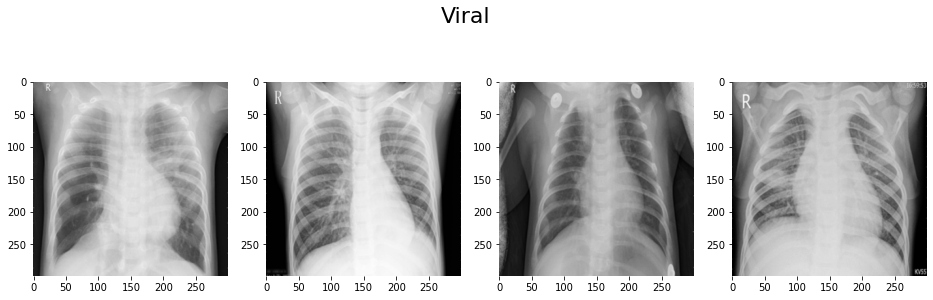

In [ ]:
viral = '/content/covid-19/viral/'
img_paths = os.listdir(viral)

fig = plt.figure(figsize=(16,5))
fig.suptitle("Viral", size=22)

for i,image in enumerate(img_paths[:4]):
    img = read_image(viral + image)
    img = T.ToPILImage()(img)
    plt.subplot(1,4, i+1, frameon=False)
    plt.imshow(img, cmap='gray')
fig.show()

#### Image plotting function

In [ ]:
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        imgs = [imgs]
    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), cmap = 'gray', **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])
    plt.tight_layout()

plt.rcParams["figure.figsize"] = (20,3)

# Single Transform done to compare Orignal Image with Final Image

In [ ]:
orig_img = Image.open(viral + img_paths[0])

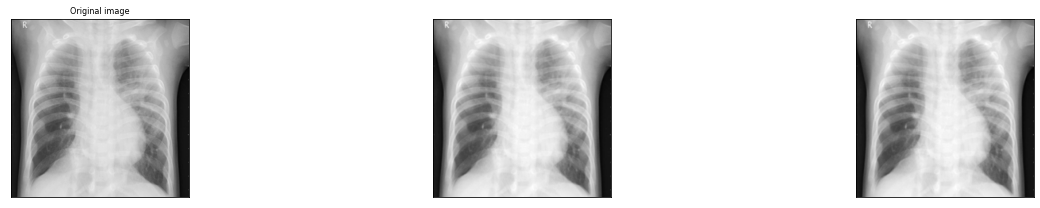

In [ ]:
# Simple Transform applied to Resize

train_resize = transforms.Compose([transforms.Resize(224)])
resized_images = [train_resize(orig_img) for _ in range(2)]
plot(resized_images)

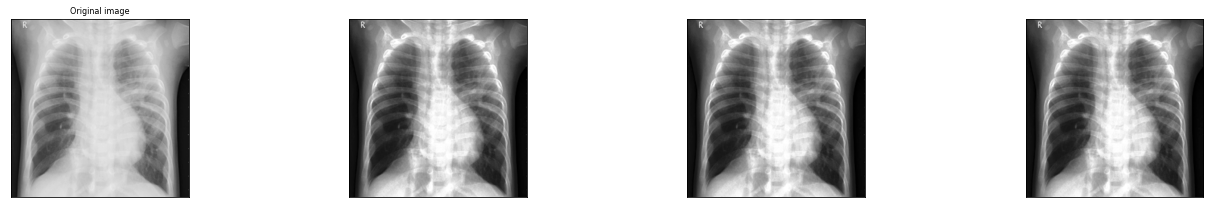

In [ ]:
# Simple Transform applied for Histogram Equalization

blurred_imgs = [transforms.functional.equalize(orig_img) for _ in range(3)]
plot(blurred_imgs)

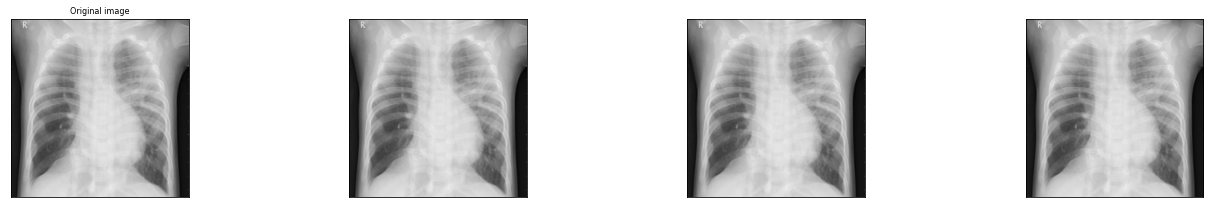

In [ ]:
# Simple Transform Applied for Gaussian Blur

train_gaussian_blurrer = transforms.GaussianBlur(kernel_size=(5,5), sigma=0.3)
gaussian_blurred_images = [train_gaussian_blurrer(orig_img) for _ in range(3)]
plot(gaussian_blurred_images)

# Applying Transfroms of dataset

In [ ]:
from copy import Error
from torchvision.utils import save_image
from tqdm import tqdm

for idx, row in tqdm(final_df.iterrows()):
  try:
    im = read_image(row.Filepath, mode=torchvision.io.ImageReadMode.GRAY)
    imP = T.functional.equalize(im)
    imP = T.functional.gaussian_blur(imP, kernel_size=(5, 5), sigma=None)
    save_image(imP/255., f"/content/covid-19/{row.label}/{row.Filepath.split('/')[-1]}")

  except RuntimeError as e:
    final_df= final_df.drop(final_df.index[[idx]], inplace=True)

8577it [04:56, 28.96it/s]


# Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

state = 30
train, test = train_test_split(final_df, test_size=0.3, random_state=state, shuffle=True, stratify=final_df['label'])
val, test = train_test_split(test, test_size=0.5, random_state=state, shuffle=True, stratify=test['label'])

In [ ]:
train_p, val_p, test_p = train.Filepath.to_list(), val.Filepath.to_list(), test.Filepath.to_list()

In [ ]:
import shutil
source_dirs = ['normal', 'viral', 'covid']

folds = ['train', 'val', 'test']

for fold in folds:
  if not os.path.exists(base_dir + fold):
    os.mkdir(base_dir + fold)

for ls, fold in zip([train_p, val_p, test_p], folds):
  for c in source_dirs:
    if not os.path.exists(base_dir + fold + '/' + c):
      os.mkdir(base_dir + fold + '/' + c)

  for p in ls:
    shutil.move(p, base_dir + fold + '/' + '/'.join(p.split('/')[-2 : ]))

# remove covid, normal and viral folder as they are empty now
!sudo rm -rf ./covid-19/covid
!sudo rm -rf ./covid-19/normal
!sudo rm -rf ./covid-19/viral

##Download all files in zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!zip -r /content/covid-19.zip /content/covid-19
# from google.colab import files
# files.download("/content/covid-19.zip")

In [ ]:
colab_link = "/content/covid-19.zip"
gdrive_link = "/content/drive/MyDrive/"
shutil.copy(colab_link, gdrive_link)

'/content/drive/MyDrive/covid-19.zip'